In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# load all dataframes
df_02 = pd.read_csv("results/var_check_temp_0.2.csv", sep=",", index_col=0)
df_04 = pd.read_csv("results/var_check_temp_0.4.csv", sep=",", index_col=0)
df_06 = pd.read_csv("results/var_check_temp_0.6.csv", sep=",", index_col=0)
df_08 = pd.read_csv("results/var_check_temp_0.8.csv", sep=",", index_col=0)
df_1 = pd.read_csv("results/var_check_temp_1.csv", sep=",", index_col=0)

In [33]:
#df_1["var"] = df_1[df_1.columns.difference(["id", "subscale", "item"])].var(axis=0)

In [41]:
def calculate_var(df):
    df = df
    res = df[df.columns.difference(["id", "subscale", "item"])].values
    var = np.var(res, axis=1)
    df["var"] = var


In [44]:
calculate_var(df_02)
calculate_var(df_04)
calculate_var(df_06)
calculate_var(df_08)
calculate_var(df_1)

In [56]:
def get_mean_vars(dfs):
    res = []
    for df in dfs:
        mean = df.loc[:, 'var'].mean()
        res.append(mean)
    return res

In [57]:
dfs = [df_02, df_04, df_06, df_08, df_1]
mean_vars = get_mean_vars(dfs)
mean_vars

[0.06079545454545456,
 0.1040909090909091,
 0.16761363636363635,
 0.25965909090909095,
 0.30297144918573493]

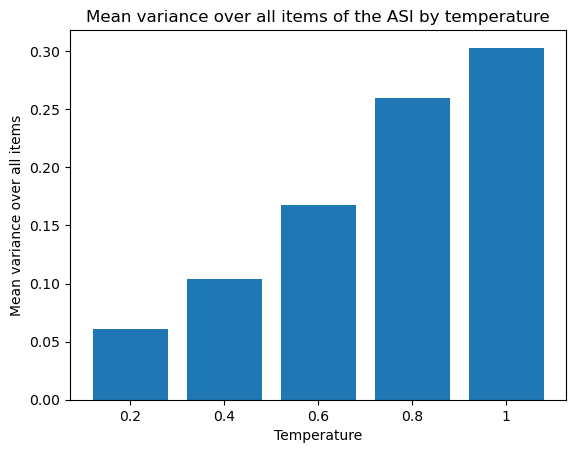

In [71]:
temp = ["0.2", "0.4", "0.6", "0.8", "1"]

plt.bar(temp, mean_vars)
plt.title("Mean variance over all items of the ASI by temperature")
plt.xlabel("Temperature")
plt.ylabel("Mean variance over all items")
plt.show()

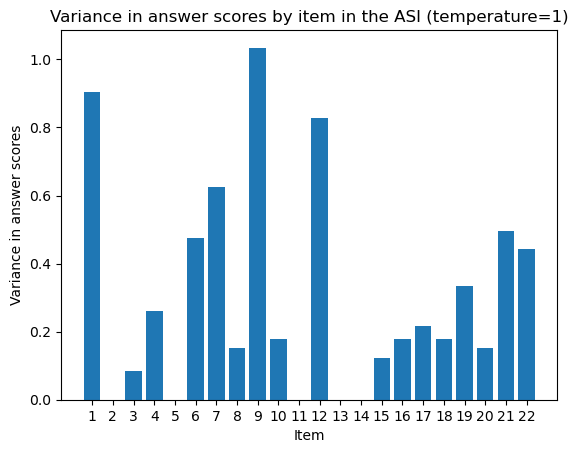

In [72]:
items = [*range(1, 23)]
var = df_1["var"].tolist()

plt.bar(items, var)
plt.xticks(np.arange(min(items), max(items)+1, 1.0))
plt.title("Variance in answer scores by item in the ASI (temperature=1)")
plt.xlabel("Item")
plt.ylabel("Variance in answer scores")
plt.show()